In [49]:
from IPython.display import display,Math,Latex
import numpy as np

import matplotlib.pyplot as plt
import scipy.fftpack as sci

In [104]:
def f(x):
    if(x>=1.0 and x<=5):
        f=4.00
    else:
        f=-1.00
#     f = 7.00 + 5.00*np.sin(2.00*x)+ 3.00*np.cos(8.00*x/2.00)
    return f



In [123]:
N=1000
UN=int(N/2)+1
Length=6*np.pi
x=np.zeros(N)
y=np.zeros(N)
y_rec=np.zeros(N)
rfft=np.zeros(N)
ifft=np.zeros(N)
x0=0.0
dx=Length/float(N)
y[0]=f(x0)

for i in range(1,N):
    x[i]=x0+dx*float(i)
    y[i]=f(x[i])
a0=y[0]
for i in range(1,N):
    a0=a0+y[i]
for u in range(1,UN):
    k=2.00*np.pi*float(u)/Length
    
    rfft[u]=f(x0)
    ifft[u]=0.00

    for i in range(1,N):
        a=2.00*np.pi*x[i]/Length
        
        rfft[u]=rfft[u]+y[i]*np.cos(float(u)*a)
        ifft[u]=ifft[u]+y[i]*np.sin(float(u)*a)
    b=np.sqrt(rfft[u]**2+ifft[u]**2)/float(N)
    
    ft=2.00*b
for u in range(N-1,N-UN+2,-1):
    rfft[u]=f(x0)
    ifft[u]=0.00
    for i in range(1,N):
        a=2.00*np.pi*x[i]/Length
        rfft[u]=rfft[u]+y[i]*np.cos(float(u)*a)
        ifft[u]=ifft[u]+y[i]*np.sin(float(u)*a)
for i in range(1,N):
    Re=0.00
    Im=0.00
    for u in range(1,UN):
        Re = Re + rfft[u]*np.cos(2.00*np.pi*float(u)*x[i]/Length)

        Im = Im + ifft[u]*np.sin(2.00*np.pi*float(u)*x[i]/Length)
    for u in range(N-1,N-UN+2,-1):
        Re = Re + rfft[u]*np.cos(2.00*np.pi*float(u)*x[i]/Length)

        Im = Im + ifft[u]*np.sin(2.00*np.pi*float(u)*x[i]/Length)

    y_rec[i]=(a0+Re+Im)/float(N)

        


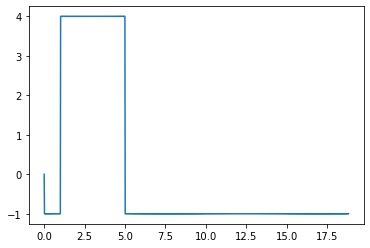

In [124]:
plt.plot(x,y_rec)




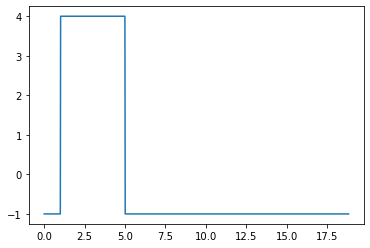

In [107]:
plt.plot(x,y)

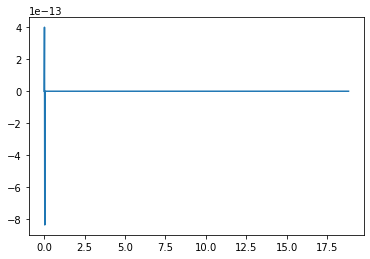

In [97]:
plt.plot(x,ifft)

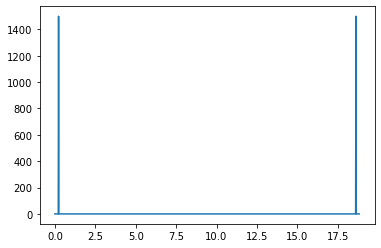

In [85]:
plt.plot(x,rfft)

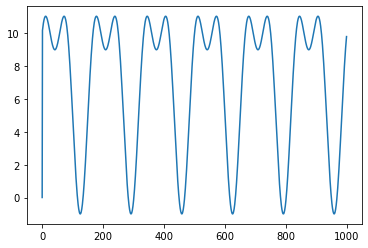

In [90]:
plt.plot(y_rec)


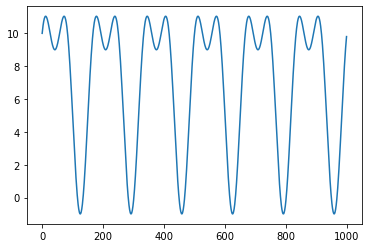

In [91]:
plt.plot(y)

### We will start with a simple Example 


# Advective equation 

### $\frac{\partial u(x,t)}{\partial t}+c\frac{\partial u(x,t)}{\partial x}=\nu\frac{\partial^2 u(x,t)}{\partial x^2}+f(x,t)$
$c= 1 and \nu =0$

Given initial condition as $u(x,0)=\sin(x)$

In [ ]:
from IPython.display import display,Math,Latex
import numpy as np

import matplotlib.pyplot as plt
import scipy.fftpack as sci

In [52]:
N=1024
L=2*np.pi
x=np.linspace(0,L,N)
UX=np.sin(x)
UX1=np.sin(x)
dt=0.00010
# plt.plot(UX)

In [53]:
UX

array([ 0.00000000e+00,  6.14188251e-03,  1.22835333e-02, ...,
       -1.22835333e-02, -6.14188251e-03, -2.44929360e-16])

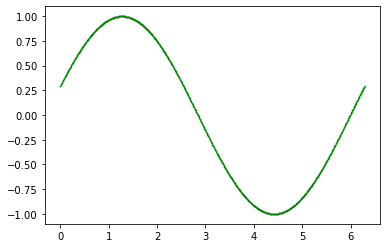

In [54]:
duk=np.ones(N,dtype=complex)
force_u_n=np.ones(N)
for i in range(1,6000):
#     Uk=sci.fft(UX)
    Uk=sci.fft(UX)
    c=complex(0,1)
    Uk=sci.fft(UX)
    for o in range(0,N):
        k=2.00*(np.pi)*float(o)/L
        duk[o]=c*k*Uk[o]
    dux=(sci.ifft(duk)).real
    for o in range(0,N):
        dux[o]=dux[o]/float(N)
        force_u_n[o]=-dux[o]
        if(i==1):
            UX[o]=UX[o]+dt*force_u_n[o]
        else:
            UX[o]=UX[o]+dt*((3.0/2.0)*force_u_n[o]-(1.0/2.0)*force_u_o[o])
    force_u_o=force_u_n


plt.scatter(x,UX,label= "stars", color= "green",
            marker= ".", s=1)
    

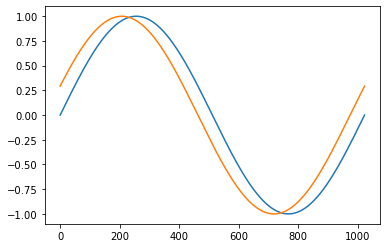

In [55]:
plt.plot(UX1)
plt.plot(UX)


It can be seen that curve is just advancing in x direction and there is no change in shape